In [1]:
!pip install datasets
!pip install accelerate -U
!pip install transformers[torch]
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from transformers import GPT2Tokenizer, GPT2LMHeadModel, DataCollatorForLanguageModeling, Trainer, TrainingArguments
from torch.utils.data import Dataset
import optuna

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/878 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

[I 2024-05-08 16:53:08,841] A new study created in memory with name: no-name-ea62a656-6e8a-414e-b426-707fb51e8069
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss


[I 2024-05-08 16:56:15,307] Trial 0 finished with value: 1.3836818933486938 and parameters: {'num_train_epochs': 8, 'per_device_train_batch_size': 4, 'learning_rate': 1.9404193226763927e-05, 'weight_decay': 0.006270824357840644, 'warmup_steps': 175, 'gradient_accumulation_steps': 33}. Best is trial 0 with value: 1.3836818933486938.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss


Step,Training Loss


[I 2024-05-08 16:58:18,272] Trial 1 finished with value: 2.7662441730499268 and parameters: {'num_train_epochs': 4, 'per_device_train_batch_size': 2, 'learning_rate': 7.26121801861627e-05, 'weight_decay': 0.08421327961423249, 'warmup_steps': 252, 'gradient_accumulation_steps': 43}. Best is trial 0 with value: 1.3836818933486938.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss


[I 2024-05-08 17:01:31,466] Trial 2 finished with value: 2.7813285191853843 and parameters: {'num_train_epochs': 6, 'per_device_train_batch_size': 1, 'learning_rate': 1.879705720958671e-05, 'weight_decay': 0.09253422870714134, 'warmup_steps': 176, 'gradient_accumulation_steps': 44}. Best is trial 0 with value: 1.3836818933486938.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss


[I 2024-05-08 17:04:39,969] Trial 3 finished with value: 0.9513769149780273 and parameters: {'num_train_epochs': 8, 'per_device_train_batch_size': 4, 'learning_rate': 9.668565057223787e-05, 'weight_decay': 0.02038416503795152, 'warmup_steps': 443, 'gradient_accumulation_steps': 47}. Best is trial 3 with value: 0.9513769149780273.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss


[I 2024-05-08 17:07:48,680] Trial 4 finished with value: 2.7017396291097007 and parameters: {'num_train_epochs': 6, 'per_device_train_batch_size': 2, 'learning_rate': 5.0141280955207267e-05, 'weight_decay': 0.0020111210374737978, 'warmup_steps': 958, 'gradient_accumulation_steps': 44}. Best is trial 3 with value: 0.9513769149780273.


Best trial:
  Loss:  0.9513769149780273
  Params: 
    num_train_epochs: 8
    per_device_train_batch_size: 4
    learning_rate: 9.668565057223787e-05
    weight_decay: 0.02038416503795152
    warmup_steps: 443
    gradient_accumulation_steps: 47


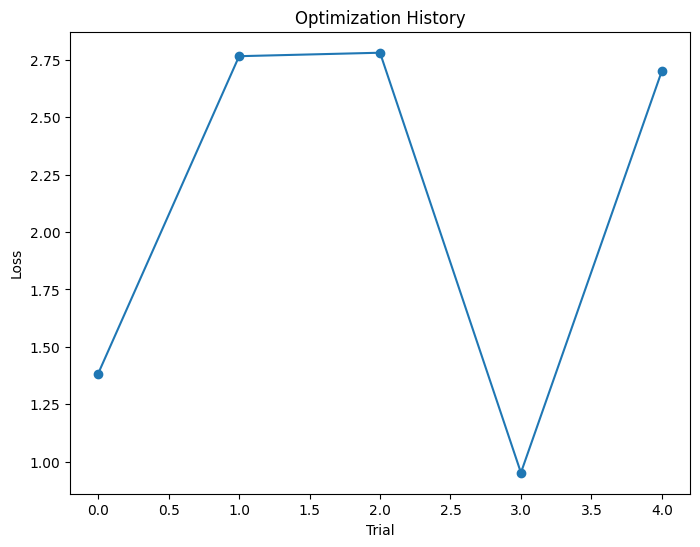

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning:

torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.



Step,Training Loss


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:90: UserWarning:

None of the inputs have requires_grad=True. Gradients will be None



Generated Lyrics:
And I said, Love the Feral. And I'm Not so Bad."

How many weeks ago this year, a lot of people had gone by a lot, but not so much a lot that people had gone by a lot. And a lot of people who had gone by a lot that I would say were the lucky ones. They were the only ones who had done it.

And one of the things people that I would say in that interview that you've heard, and you've seen a lot of, and you've seen a lot of people that really, really kind of have done. And you've seen the people that were like, "That's just a lot of people, we could do it." And you've seen the people that are like, "That's not that far" and you've seen the people that aren't a lot of people not a lot of people.

Are people still in college?


You know people that are


In [3]:
# Loading the Dataset from hugging face
# dataset = load_dataset("huggingartists/the-beatles")
dataset = load_dataset("huggingartists/the-beatles", split='train[:10%]')
train_text = dataset['text']
# train_text = dataset['train']['text']

# Preprocessing the Data
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
train_encodings = tokenizer(train_text, truncation=True, padding=True)

# Building the Model
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Training the Model
class TextDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings['input_ids'])

train_dataset = TextDataset(train_encodings)

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    loss = torch.mean(torch.stack(logits))
    return {"loss": loss.item()}

# def objective(trial):
#     training_args = TrainingArguments(
#         output_dir='./results',
#         num_train_epochs=trial.suggest_int("num_train_epochs", 1, 10),
#         per_device_train_batch_size=trial.suggest_int("per_device_train_batch_size", 1, 8),
#         save_steps=500,
#         save_total_limit=2,
#         logging_dir='./logs',
#         learning_rate=trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True),
#         weight_decay=trial.suggest_float("weight_decay", 1e-3, 1e-1, log=True),
#         warmup_steps=trial.suggest_int("warmup_steps", 100, 1000),
#         gradient_accumulation_steps=trial.suggest_int("gradient_accumulation_steps", 16, 32),
#     )

def objective(trial):
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=trial.suggest_int("num_train_epochs", 1, 10),
        per_device_train_batch_size=trial.suggest_int("per_device_train_batch_size", 1, 4),
        save_steps=300,
        save_total_limit=2,
        logging_dir='./logs',
        learning_rate=trial.suggest_float("learning_rate", 1e-5, 1e-4, log=True),
        weight_decay=trial.suggest_float("weight_decay", 1e-3, 1e-1, log=True),
        warmup_steps=trial.suggest_int("warmup_steps", 100, 1000),
        gradient_accumulation_steps=trial.suggest_int("gradient_accumulation_steps", 32, 64),
        gradient_checkpointing=True,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=train_dataset,  # Use the training dataset for evaluation
        compute_metrics=compute_metrics,
        data_collator=data_collator,
    )

    train_result = trainer.train()
    loss = train_result.metrics["train_loss"]
    return loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)

best_trial = study.best_trial
print("Best trial:")
print("  Loss: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

# Plotting the optimization history
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("Trial")
ax.set_ylabel("Loss")
ax.plot([t.value for t in study.trials], marker='o', linestyle='-')
ax.set_title("Optimization History")
plt.show()

# Plotting the parameter importance
fig = optuna.visualization.plot_param_importances(study)
fig.show()

# Training with the best hyperparameters
best_params = study.best_params
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=best_params["num_train_epochs"],
    per_device_train_batch_size=best_params["per_device_train_batch_size"],
    save_steps=500,
    save_total_limit=2,
    logging_dir='./logs',
    learning_rate=best_params["learning_rate"],
    weight_decay=best_params["weight_decay"],
    warmup_steps=best_params["warmup_steps"],
    gradient_accumulation_steps=best_params["gradient_accumulation_steps"],
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=train_dataset,  # Use the training dataset for evaluation
    compute_metrics=compute_metrics,
    data_collator=data_collator,
)

train_result = trainer.train()

# Access loss:
train_loss = train_result.metrics["train_loss"]

# Step 5: Generating New Lyrics
def generate_lyrics(input_text, do_sample=True, temperature=0.8, max_length=200):
    input_ids = tokenizer.encode(input_text, return_tensors="pt")
    input_ids = input_ids.to(model.device)  # Move input_ids to the same device as the model

    generated_lyrics = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        do_sample=do_sample,
        temperature=temperature,
    )

    decoded_lyrics = tokenizer.decode(generated_lyrics[0], skip_special_tokens=True)
    return decoded_lyrics

# Input:
input_text = "And I said, Love"
generated_lyrics = generate_lyrics(input_text)
print("Generated Lyrics:")
print(generated_lyrics)